# Generate random galaxy power spectrum in observed coordinates

Instead of using comoving wavenumbers ($k_\perp$,$k_\parallel$), in 1/Mpc, we use dimensionless
wavenumbers, corresponding to radians and dv/c = log(1+z):

$q_\perp = k_\perp D_A(z) (1+z) \hspace{20pt} q_\parallel = k_\parallel D_H(z) (1+z) \hspace{10pt}$

with $\hspace{10pt} D_H(z) = \frac{c}{H(z)}$.

In [1]:
%matplotlib inline
import numpy as np
import os
## Set default plot size, as normally its a bit too small
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['savefig.dpi'] = 120
mpl.rcParams['figure.dpi'] = 120
import camb
from sigmaX import cosmology
from sigmaX import galaxy_power
from sigmaX import galaxy_survey

### Setup cosmology dictionaries, with everything we might want to use later on

In [2]:
z=0.02
b=2.0
cosmo_true=cosmo.get_cosmo(z=z,b=b)
cosmo.print_cosmo_info(cosmo_true)

f = 0.5456054001560122
sig8 = [0.79439401]
sig12 = [0.79167321]
DA = 87.31755529174495
DH = 4431.799203422664


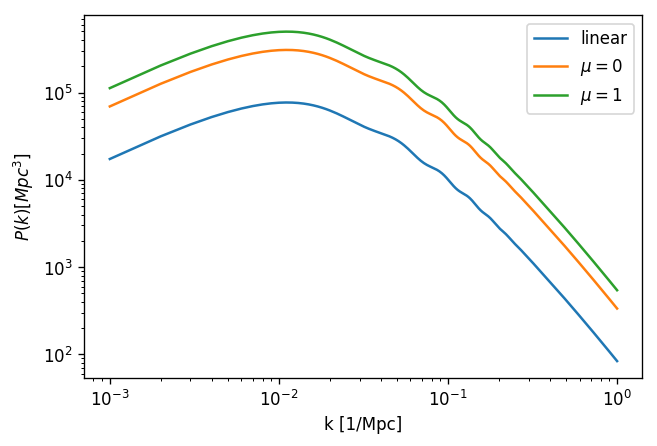

In [3]:
galaxy_power.plot_galP_Mpc(cosmo_true)

### Setup survey geometry and fractional uncertainties

$\frac{ \sigma_P }{P} = 2 \pi \sqrt {\frac{2}{V k^2 dk dmu} } \frac{1+n P}{n P} = 2 \pi \sqrt{ \frac{2}{V k_t dk_t dk_p} } \frac{1+n P}{n P}$

In [6]:
sur=survey.get_survey(cosmo_true)

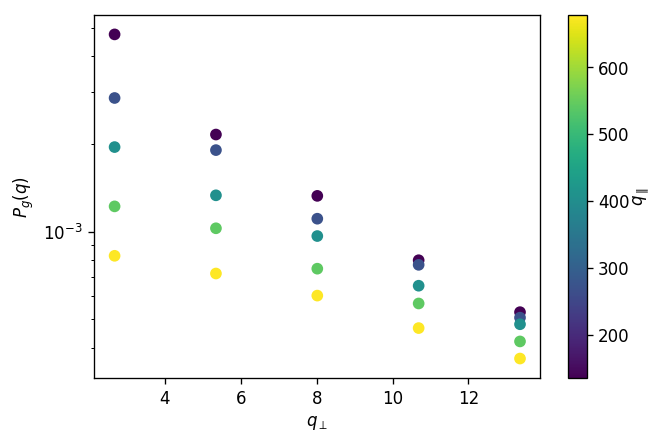

In [8]:
galaxy_power.plot_galP_obs(sur['qt'],sur['qp'],cosmo_true,cosmo_true)

### Generate random realisation (in observed coordinates)

In [ ]:
# compute true model for galaxy power
galP_obs=galaxy_power.get_galP_obs(qt,qp,cosmo_true,cosmo_true) 
# compute random realisation
galP_err=galP_obs*sigP_P
galP_real=galP_obs+galP_err*np.random.normal(size=Ntot)

In [ ]:
plt.yscale('log')
plt.scatter(qt,galP_real,c=qp)
cbar=plt.colorbar()
cbar.set_label(r'$q_\parallel$', labelpad=+1)
#plt.errorbar(qt,galP_real,yerr=galP_err,fmt="o")
#plt.plot(qt,galP_obs,"x")
plt.xlabel(r'$q_\perp$')
plt.ylabel(r'$P_g(q)$')

In [ ]:
galaxy_power.plot_galP_obs(qt,qp,cosmo_true,cosmo_true)

### Make predictions with the wrong cosmology

In [ ]:
# we will use the wrong reference cosmology (different h and Omega_m)
cosmo_ref=cosmo.get_cosmo(z,H0=50)

In [ ]:
cosmo.print_cosmo_info(cosmo_ref)

In [ ]:
cosmo.print_cosmo_info(cosmo_true)

### Make predictions for different models

In [ ]:
def plot_residuals(qt,qp,cosmo_coord=None,cosmo_temp=None,params={},scatter=True):
    galP_ref=galaxy_power.get_galP_obs(qt,qp,cosmo_coord=cosmo_coord,cosmo_temp=cosmo_temp,params=params)
    if scatter:
        plt.scatter(qt,galP_obs/galP_ref,c=qp)
        cbar=plt.colorbar()
        cbar.set_label(r'$q_\parallel$', labelpad=+1)        
    else:
        plt.errorbar(qt,galP_real/galP_ref,yerr=galP_err/galP_ref,fmt="o")
        plt.plot(qp,galP_obs/galP_ref,"x")
    plt.xlabel(r'$q_\perp$')
    plt.ylabel(r'$P_g/P_{\rm g, ref}(q)$')

In [ ]:
# make prediction for galaxy power spectrum using reference model
#params={'bsig8':1.3,'fsig8':0.5,'at':1.05,'ap':0.95}
bsig8_true=b*cosmo_true['sig8']
fsig8_true=cosmo_true['f']*cosmo_true['sig8']
at_true=cosmo_true['DA']/cosmo_ref['DA']
ap_true=cosmo_true['DH']/cosmo_ref['DH']
plot_residuals(qt,qp,cosmo_coord=cosmo_ref,cosmo_temp=cosmo_ref,
               params={'bsig8':bsig8_true,'fsig8':fsig8_true,'at':at_true,'ap':ap_true})

In [ ]:
# make prediction for galaxy power spectrum using reference model
#params={'bsig8':1.3,'fsig8':0.5,'at':1.05,'ap':0.95}
bsig8_true=b*cosmo_true['sig8']
fsig8_true=cosmo_true['f']*cosmo_true['sig8']
at_true=cosmo_true['DA']/cosmo_ref['DA']
ap_true=cosmo_true['DH']/cosmo_ref['DH']
plot_residuals(qt,qp,cosmo_coord=cosmo_ref,cosmo_temp=cosmo_true,
              params={'at':at_true,'ap':ap_true})